# Support Vector Machines

In [64]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

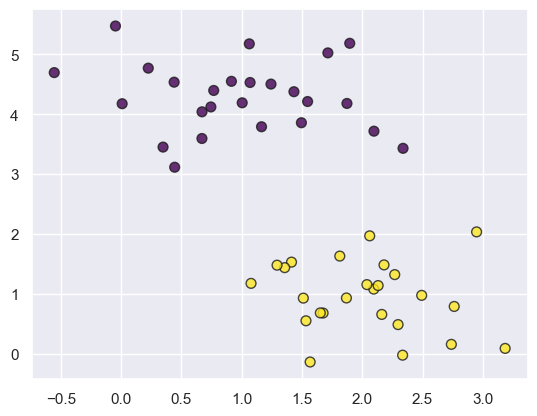

In [65]:
from sklearn.datasets import make_blobs

X, y = make_blobs(
    n_samples=50, centers=2, random_state=0, cluster_std=0.60
)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, alpha=.8, edgecolors='k', cmap='viridis')

In [66]:
from sklearn.svm import SVC # "Support vector classifier"
svm = SVC(kernel='linear', C=1E10)
svm.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [67]:
def plot_decision_boundary(svm_, X_, y_):
    dbound = DecisionBoundaryDisplay.from_estimator(
        svm_, X_, response_method="predict", alpha=0.4
    )

    # Plotting support vectors
    plt.scatter(
        svm_.support_vectors_[:, 0],
        svm_.support_vectors_[:, 1],
        s=300, linewidth=1,
        facecolors='none', edgecolor='k'
    )

    w = svm_.coef_[0]
    xx = np.linspace(dbound.ax_.get_xlim()[0], dbound.ax_.get_xlim()[1])
    y_min, y_max = dbound.ax_.get_ylim()[0], dbound.ax_.get_ylim()[1]

    # Getting the hyperplane: w_1x + w_2y + b = 0
    yy = (-xx * w[0] - svm_.intercept_[0]) / w[1]
    plt.plot(xx,  np.clip(yy, y_min, y_max), '-', color='k', linewidth=4)

    # Getting the margins: w_1x + w_2y + b = -1 and +1
    yy_down = (-xx * w[0] - svm_.intercept_[0] - 1) / w[1]
    yy_up = (-xx * w[0] - svm_.intercept_[0] + 1) / w[1]
    
    plt.plot(xx, np.clip(yy_down, y_min, y_max), '--', color='k', linewidth=2)
    plt.plot(xx, np.clip(yy_up, y_min, y_max), '--', color='k', linewidth=2)


    plt.scatter(X_[:, 0], X_[:, 1], c=y_, alpha=.8, edgecolor="k", cmap='viridis')

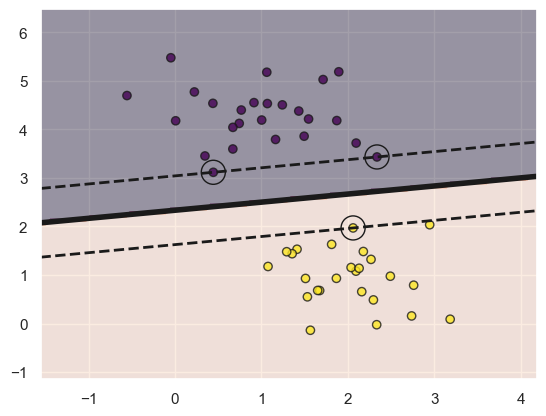

In [68]:
plot_decision_boundary(svm, X, y)

## Soft Margins

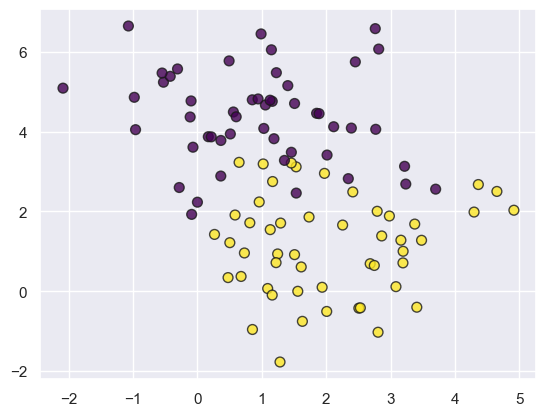

In [82]:
X_m, y_m = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X_m[:, 0], X_m[:, 1], c=y_m, s=50, alpha=.8, edgecolors='k', cmap='viridis')

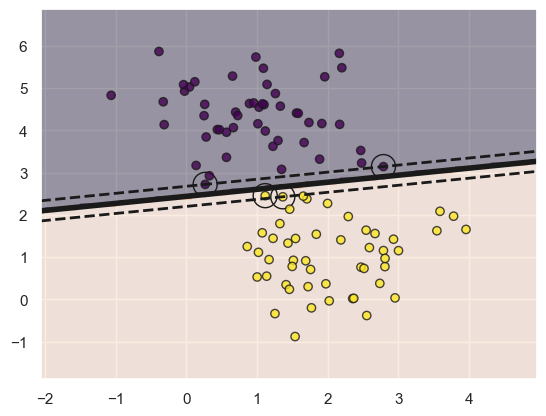

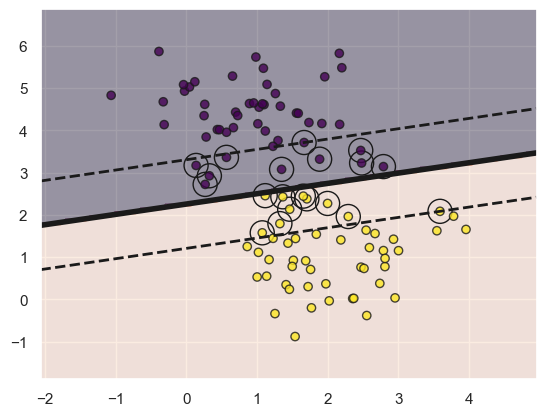

In [88]:
X_m, y_m = make_blobs(
    n_samples=100, centers=2, random_state=0, cluster_std=0.8
)


for C in [10.0, 0.1]:
    svm_c = SVC(kernel='linear', C=C).fit(X_m, y_m)
    plot_decision_boundary(svm_c, X_m, y_m)

## Kernels

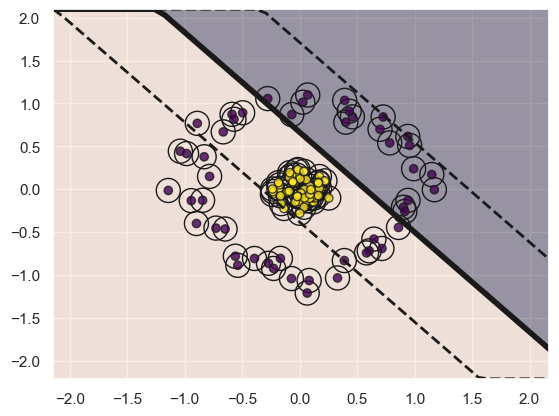

In [69]:
from sklearn.datasets import make_circles
X_n, y_n = make_circles(100, factor=.1, noise=.1)

svm = SVC(kernel='linear').fit(X_n, y_n)

plot_decision_boundary(svm, X_n, y_n)

In [70]:
r = np.exp(-(X_n ** 2).sum(1))

In [89]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='viridis')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=(-90, 90), azip=(-180, 180),
         X=fixed(X_n), y=fixed(y_n));


interactive(children=(IntSlider(value=30, description='elev', max=90, min=-90), IntSlider(value=30, descriptio…

In [77]:
svm_k = SVC(kernel='rbf', C=1E6)
svm_k.fit(X_n, y_n)

SVC(C=1000000.0)

In [78]:
def general_svm_decision_boundary(svm, ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = svm.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(
        X, Y, P, colors='k',
        levels=[-1, 0, 1], alpha=0.5,
        linestyles=['--', '-', '--']
    )
    
    # plot support vectors
    ax.scatter(
        svm.support_vectors_[:, 0],
        svm.support_vectors_[:, 1],
        s=300, linewidth=1, 
        facecolors='none', edgecolor='k'
    )
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

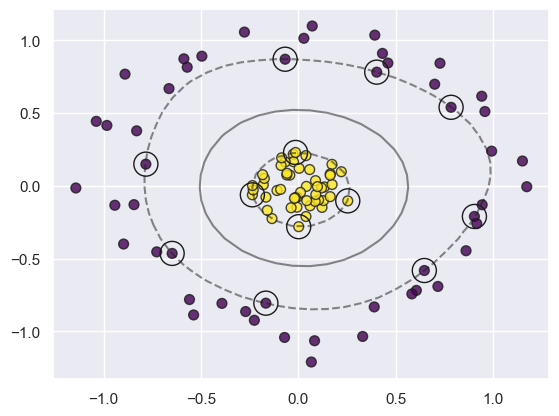

In [90]:
plt.scatter(X_n[:, 0], X_n[:, 1], c=y_n, s=50, alpha=.8, edgecolors='k', cmap='viridis')
general_svm_decision_boundary(svm_k)